In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback

%matplotlib inline

In [ ]:
# Load data
filename = "DATA_CHORUS_0.02.yaml"
with open(filename, "r") as file:
    input_data = yaml.safe_load(file)
x = input_data["x"]


In [2]:
# Construct the Dataset
SIZE = 100
x_data = np.linspace(-10, 10, num=SIZE)
y_data = 0.1*x_data*np.cos(x_data) + 5e-2*np.random.normal(size=SIZE)

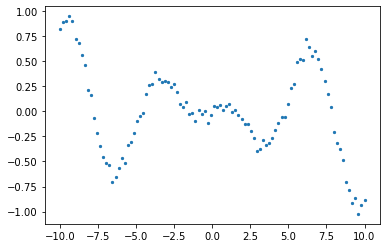

In [3]:
plt.scatter(x_data, y_data, s=5)

In [5]:
# Create the NN model
model = Sequential()
model.add(Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam", metrics=["accuracy"])

# Display the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,155
Trainable params: 1,155
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit( x_data, y_data, epochs=1000, batch_size=10, verbose=0)

In [8]:
x_pred = np.linspace(-10, 10, num=SIZE+1)
y_pred = model.predict(x_pred)

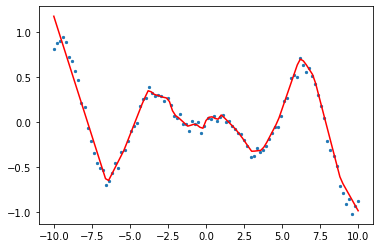

In [9]:
plt.scatter(x_data, y_data, s=5)
plt.plot(x_pred, y_pred, color="red")